In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
#경로확인할것
df_train = pd.read_csv("data/titanic_train.csv")
df_test = pd.read_csv("data/titanic_test.csv")

In [73]:
df_train.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."


In [74]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     393 non-null    int64  
 1   survived   393 non-null    int64  
 2   name       393 non-null    object 
 3   sex        393 non-null    object 
 4   age        305 non-null    float64
 5   sibsp      393 non-null    int64  
 6   parch      393 non-null    int64  
 7   ticket     393 non-null    object 
 8   fare       393 non-null    float64
 9   cabin      81 non-null     object 
 10  embarked   393 non-null    object 
 11  body       36 non-null     float64
 12  home.dest  218 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 40.0+ KB


In [75]:
# 한번만 실행할것
df_train = df_train.drop(['name','ticket','body','cabin','home.dest'],axis = 1)
df_test = df_test.drop(['name','ticket','body','cabin','home.dest'],axis = 1)

In [76]:
df_train.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,2,1,female,13.0,0,1,19.5000,S
1,2,1,female,4.0,1,1,23.0000,S
2,2,1,female,30.0,1,0,13.8583,C
3,3,0,male,NaN,0,0,7.7250,Q
4,3,1,female,22.0,0,0,7.7250,Q


In [77]:
df_test.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,3,0,male,38.0,0,0,7.8958,S
1,2,1,female,21.0,0,1,21.0000,S
2,2,0,male,42.0,1,0,27.0000,S
3,3,0,male,NaN,0,0,14.5000,S
4,2,0,male,25.0,0,0,31.5000,S


AxesSubplot(0.125,0.125;0.775x0.755)


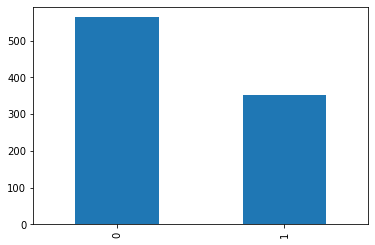

In [78]:
print(df_train['survived'].value_counts().plot.bar())

In [79]:
#survived 피처를 기준으로 그룹을 나누어 그룹별 pclass 피처의 분포를 살펴보자
#pclass 승객 등급

print(df_train['pclass'].value_counts())

3    498
1    230
2    188
Name: pclass, dtype: int64


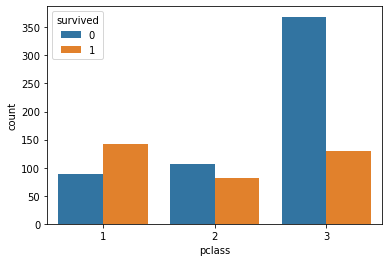

In [80]:
ax = sns.countplot(x = 'pclass', hue = 'survived', data = df_train)

In [81]:
from scipy import stats

# 두 집단의 피처를 비교해주며 탐색작업을 자동화하는 함수를 정의합니다.
def valid_features(df, col_name, distribution_check=True):
    
    # 두 집단 (survived=1, survived=0)의 분포 그래프를 출력합니다.
    g = sns.FacetGrid(df, col='survived')
    g.map(plt.hist, col_name, bins=30)

    # 두 집단 (survived=1, survived=0)의 표준편차를 각각 출력합니다.
    titanic_survived = df[df['survived']==1]
    titanic_survived_static = np.array(titanic_survived[col_name])
    print("data std is", '%.2f' % np.std(titanic_survived_static))
    titanic_n_survived = df[df['survived']==0]
    titanic_n_survived_static = np.array(titanic_n_survived[col_name])
    print("data std is", '%.2f' % np.std(titanic_n_survived_static))
    
     # T-test로 두 집단의 평균 차이를 검정합니다.
    tTestResult = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name])
    tTestResultDiffVar = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name], equal_var=False)
    print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
    print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)
    
    if distribution_check:
        # Shapiro-Wilk 검정 : 분포의 정규성 정도를 검증합니다.
        print("The w-statistic and p-value in Survived %.3f and %.3f" % stats.shapiro(titanic_survived[col_name]))
        print("The w-statistic and p-value in Non-Survived %.3f and %.3f" % stats.shapiro(titanic_n_survived[col_name]))

data std is 14.22
data std is 13.71
The t-statistic and p-value assuming equal variances is -0.546 and 0.585.
The t-statistic and p-value not assuming equal variances is -0.543 and 0.587
The w-statistic and p-value in Survived 0.982 and 0.001
The w-statistic and p-value in Non-Survived 0.968 and 0.000


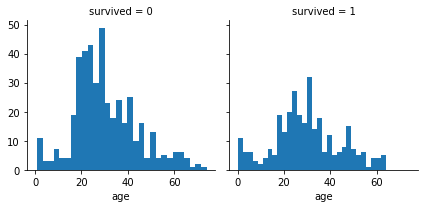

In [82]:
# 함수 실행 age, sibsp

valid_features(df_train[df_train['age']>0],'age',distribution_check=True)


data std is 0.64
data std is 1.34
The t-statistic and p-value assuming equal variances is -2.118 and 0.034.
The t-statistic and p-value not assuming equal variances is -2.446 and 0.015


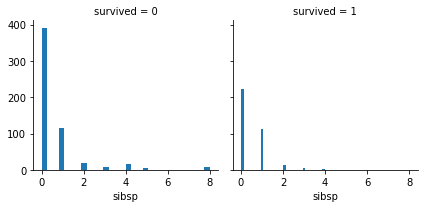

In [83]:
valid_features(df_train,'sibsp',distribution_check=False)

data std is 0.64
data std is 1.34
The t-statistic and p-value assuming equal variances is -2.118 and 0.034.
The t-statistic and p-value not assuming equal variances is -2.446 and 0.015
The w-statistic and p-value in Survived 0.656 and 0.000
The w-statistic and p-value in Non-Survived 0.492 and 0.000


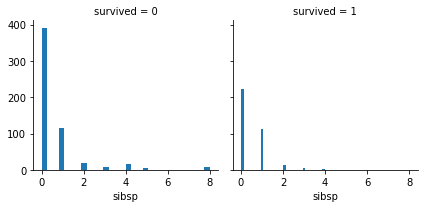

In [84]:
# parch : 동승한 부모 또는 자녀수
# sex : 탑승자의 성별

valid_features(df_train,'sibsp',distribution_check = True)
# sibsp 동승한 형제 또는 배우자 수

data std is 0.88
data std is 0.75
The t-statistic and p-value assuming equal variances is -9.848 and 0.000.
The t-statistic and p-value not assuming equal variances is -9.507 and 0.000
The w-statistic and p-value in Survived 0.759 and 0.000
The w-statistic and p-value in Non-Survived 0.657 and 0.000


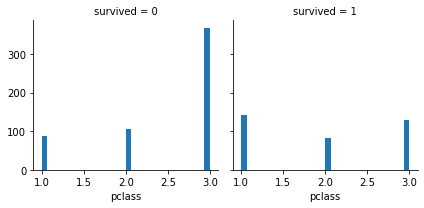

In [85]:
valid_features(df_train,'pclass',distribution_check=True)


In [86]:
# 로지스틱 회귀 모델
# 기존의 회귀 분석의 예측값 Y를 0-1 사이의 값으로 제한
# ***********0.5보다 크면           0.5보다 작으면**********
# 으로 분류하는 방법, 개수 분석을 통한 피처의 영향엵 해석이 용이하다는 장점을 가진다.

## 전처리 1) 결측이 존재하는 데이터를 삭제 
##        2) 평균값, 또는 중앙값 또는 최빈값 등의 임의의 수치로 채워 넣는 방법
##        3) 데이터를 모두 분석에 활용할수 있는 장점인 반면에 수치 왜곡의 가능성
##        4) 2)번 방법을 사용하여 전처리
##        5) age의 결측값을 평균값으로 대체하다.

replace_mean = df_train[df_train['age'] > 0]['age'].mean()
df_train['age'] = df_train['age'].fillna(replace_mean)
df_test['age'] = df_test['age'].fillna(replace_mean)

#embark의 결측값을 최빈값 대체하자
embarked_mode = df_train['embarked'].value_counts().index[0]
df_train['embarked'] = df_train['embarked'].fillna(embarked_mode)
df_test['embarked'] = df_test['embarked'].fillna(embarked_mode)

# 원-핫 인코딩, 
# 통합 데이터 프레임 (whwole_df) 생성
whole_df = df_train.append(df_test)
train_idx_num = len(df_train)

# pandas 패키지를 이용해서 원-핫 인코딩 수행
whole_df_encoded = pd.get_dummies(whole_df)
df_train = whole_df_encoded[:train_idx_num]
df_test = whole_df_encoded[:train_idx_num]

df_train.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,1,0,0,0,1
1,2,1,4.000000,1,1,23.0000,1,0,0,0,1
2,2,1,30.000000,1,0,13.8583,1,0,1,0,0
3,3,0,30.231444,0,0,7.7250,0,1,0,1,0
4,3,1,22.000000,0,0,7.7250,1,0,0,1,0


In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [88]:
# 데이터를 학습 데이터와 테스트 데이터로 분리

x_train, y_train = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values

In [106]:
x_test, y_test = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values

In [107]:
# 로지스틱 회귀 모델 학습

lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [108]:
y_pred = lr.predict(x_test)
print(y_pred)

[1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1
 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0
 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0
 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1
 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0
 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0
 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0
 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0
 0 0 0 1 0 1 0 0 1 0 1 0 

In [109]:
y_pred_p = lr.predict_proba(x_test)[:,1]
print(y_pred_p)

[0.86138383 0.84959557 0.8188299  0.1260009  0.7057685  0.12601445
 0.94241896 0.85735214 0.34485924 0.37200709 0.31536415 0.64134053
 0.9426176  0.28636327 0.10268981 0.23130496 0.24566555 0.12104395
 0.94452495 0.10268981 0.65239145 0.75987551 0.09536933 0.13896696
 0.07015036 0.40299823 0.51777302 0.84297278 0.097917   0.53700482
 0.40491826 0.11731547 0.07593182 0.55125424 0.16948754 0.18573139
 0.07663399 0.10261264 0.09791993 0.86924775 0.12674621 0.28332583
 0.13439221 0.64222097 0.12712164 0.0703848  0.13089941 0.21614952
 0.44188524 0.20939229 0.85284221 0.85911523 0.14151946 0.10057718
 0.8888016  0.16948754 0.21614952 0.28316169 0.1490431  0.16956242
 0.14605388 0.65551794 0.72650623 0.07971329 0.102631   0.12769939
 0.83136729 0.55188569 0.12107861 0.08316063 0.1235006  0.73540029
 0.40750983 0.93597885 0.08482815 0.07877368 0.06239184 0.7599739
 0.68197578 0.88026925 0.51617001 0.95184867 0.30693615 0.5095174
 0.66896534 0.90424919 0.20872774 0.71156315 0.10139902 0.892260

In [110]:
# 로지스틱 회귀 모델과 더불어 분류 분석의 가장 대표적인 방법인 의사결정나무(Decision Tree) 모델을 적용해 보자
# 의사 결정 나무 모델은 피처 단위로 조건을 분기하여 정답의 집합을 좁혀나가는 방법
# 마치 스무고개 놀이에서 정답을 찾아 나가는 과정과 유사하다.

from sklearn.tree import DecisionTreeClassifier

# 의사 결정 나무를 학습하고, 학습한 모델로 테스트 데이터셋에 대한 예측값을 반환한다.
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

print(y_pred)

y_pred_p = dtc.predict_proba(x_test)[:,1]

[1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1
 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1
 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1
 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1
 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0
 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0
 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 1 0 

In [111]:
# 분류 모델 평가
# 테스트 데이터에 대한 정확도, 정밀도, 특이도, 평가 지표

print("정확도 : %.2f" % accuracy_score(y_test, y_pred))
print("정밀도 : %.2f" % precision_score(y_test, y_pred))
print("특이도 : %.2f" % recall_score(y_test, y_pred))
print("평가지표 : %2f" % f1_score(y_test, y_pred))

정확도 : 0.98
정밀도 : 0.99
특이도 : 0.95
평가지표 : 0.968300


In [115]:
##############################################
# 모델 개선
##############################################

# 분류 모델의 성능을 더욱 끌어올리기 위해서
# 1) 좋은 분류 기법을 사용해야 한다.
# 2) 더 많은 데이터를 사용한다.
# 3) 피처엔지니어링 Feature Engineering
#    피처 엔지니어링은 모델에 사용할 피처를 가공하는 분석 작업을 말한다.

df_test = pd.read_csv("data/titanic_test.csv")
df_train = pd.read_csv("data/titanic_train.csv")

In [120]:
# age의 결측값을 평균값으로 대체하자
replace_mean = df_train[df_train['age'] > 0]['age'].mean()
df_train['age'] = df_train['age'].fillna(replace_mean)
df_test['age'] = df_test['age'].fillna(replace_mean)

#embark의 결측값을 최빈값 대체하자
embarked_mode = df_train['embarked'].value_counts().index[0]
df_train['embarked'] = df_train['embarked'].fillna(embarked_mode)
df_test['embarked'] = df_test['embarked'].fillna(embarked_mode)

# 원-핫 인코딩, (카테고리 정규화)
# 통합 데이터 프레임 (whwole_df) 생성
whole_df = df_train.append(df_test)
train_idx_num = len(df_train)

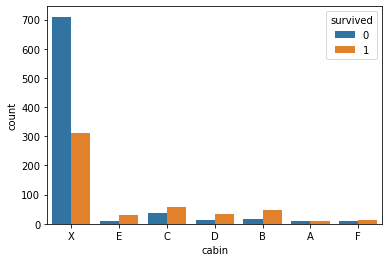

In [121]:
# 피처 엔지니어링 & 전처리

# cabin 피처 활용

# 결측 데이터를 'X' 대체
whole_df['cabin'] = whole_df['cabin'].fillna('X')

# cabin 피처의 첫 번째 알파벳을 추출하다.
whole_df['cabin'] = whole_df['cabin'].apply(lambda x:x[0])

# 추출한 알파벳 중에 G T 수가 너무 작기때문에 X 대체
whole_df['cabin'] = whole_df['cabin'].replace({"G" : "X" , "T" : "X"})

ax = sns.countplot(x = 'cabin', hue = 'survived', data = whole_df)
plt.show()

In [122]:
# name 피처  성  호칭  이름

whole_df.head()

name_grade = whole_df['name'].apply(lambda x:x.split(", ",1)[1].split(".")[0])
name_grade = name_grade.unique().tolist()
print(name_grade)

['Miss', 'Mr', 'Master', 'Mrs', 'Dr', 'Mlle', 'Col', 'Rev', 'Ms', 'Mme', 'Sir', 'the Countess', 'Dona', 'Jonkheer', 'Lady', 'Major', 'Don', 'Capt']


In [125]:
# 호칭에 따라서 사회적 지위를 정의 (1910 기준)
grade_dict = {'A' : ['Rev','Col','Major','Dr','Capt','Sir'],
              'B' : ['Ms','Mme','Mrs','Dona'],
              'C' : ['Jonkheer','the Countess'],
              'D' : ['Mr','Don'],
              'E' : ['Master'],
              'F' : ['Miss','Mlle','Lady']}

In [127]:
def give_grade(x):
    grade = x.split(", ", 1)[1].split(".")[0]
    for key, value in grade_dict.items():
        for title in value:
            if grade == title:
                return key
    return 'G'

whole_df['name'] = whole_df['name'].apply(lambda x : give_grade(x))
print(whole_df['name'].value_counts())

D    758
F    263
B    201
E     61
A     24
C      2
Name: name, dtype: int64


In [126]:
print(whole_df)

     pclass  survived                                          name     sex  \
0         2         1             Mellinger, Miss. Madeleine Violet  female   
1         2         1                             Wells, Miss. Joan  female   
2         2         1                Duran y More, Miss. Florentina  female   
3         3         0                            Scanlan, Mr. James    male   
4         3         1                  Bradley, Miss. Bridget Delia  female   
..      ...       ...                                           ...     ...   
388       3         0             Karlsson, Mr. Julius Konrad Eugen    male   
389       2         1  Ware, Mrs. John James (Florence Louise Long)  female   
390       3         1                          O'Keefe, Mr. Patrick    male   
391       3         0                              Tobin, Mr. Roger    male   
392       1         1                          Daniels, Miss. Sarah  female   

           age  sibsp  parch         ticket      fa

In [128]:
whole_df_encoded = pd.get_dummies(whole_df)
df_train = whole_df_encoded[:train_idx_num]
df_test = whole_df_encoded[:train_idx_num:]
df_train.head()

,pclass,survived,age,sibsp,parch,fare,body,name_A,name_B,name_C,...,"home.dest_Wimbledon Park, London / Hayling Island, Hants","home.dest_Windsor, England New York, NY","home.dest_Winnipeg, MB","home.dest_Winnipeg, MN","home.dest_Woodford County, KY","home.dest_Worcester, England","home.dest_Worcester, MA","home.dest_Yoevil, England / Cottage Grove, OR","home.dest_Youngstown, OH","home.dest_Zurich, Switzerland"
0,2,1,13.000000,0,1,19.5000,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,4.000000,1,1,23.0000,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,30.000000,1,0,13.8583,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,30.231444,0,0,7.7250,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1,22.000000,0,0,7.7250,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
# 데이터를 학습 데이터와 테스트 데이터로 분리

x_train, y_train = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values
x_test, y_test = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values

In [130]:
whole_df['body'] = whole_df['body'].fillna('0')

In [131]:
df_train.head(10)

,pclass,survived,age,sibsp,parch,fare,body,name_A,name_B,name_C,...,"home.dest_Wimbledon Park, London / Hayling Island, Hants","home.dest_Windsor, England New York, NY","home.dest_Winnipeg, MB","home.dest_Winnipeg, MN","home.dest_Woodford County, KY","home.dest_Worcester, England","home.dest_Worcester, MA","home.dest_Yoevil, England / Cottage Grove, OR","home.dest_Youngstown, OH","home.dest_Zurich, Switzerland"
0,2,1,13.000000,0,1,19.5000,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,4.000000,1,1,23.0000,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,30.000000,1,0,13.8583,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,30.231444,0,0,7.7250,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1,22.000000,0,0,7.7250,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3,0,30.231444,0,0,7.8792,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,30.000000,0,0,56.9292,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2,1,2.000000,1,1,26.0000,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,49.000000,1,1,110.8833,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,35.000000,0,0,26.2875,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
